In [3]:
pip install TextBlob


  Attempting uninstall: nltk
    Found existing installation: nltk 3.7
    Uninstalling nltk-3.7:
      Successfully uninstalled nltk-3.7
Note: you may need to restart the kernel to use updated packages.


In [27]:
#importing all libraries

import numpy as np
import pandas as pd
from textblob import TextBlob
import plotly.graph_objects as go
import plotly.express as xp
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#Loading up the dataset

df = pd.read_csv('LokSabha_Election_2024_Tweets.csv')
df.head()

,link,text,date,No_of_likes,No_of_comments
0,https://twitter.com/Politics_2022_/status/1739...,South India 2024 Loksabha Opinion Poll 132 sea...,"Dec 25, 2023 · 12:05 PM UTC",324,27
1,https://twitter.com/LokmatTimes_ngp/status/173...,"Veteran actor Nana Patekar says, ""There is no ...","Dec 25, 2023 · 1:00 PM UTC",0,0
2,https://twitter.com/Politics_2022_/status/1739...,South India BJP 2019 Loksabha Karnataka 25 Tel...,"Dec 25, 2023 · 12:21 PM UTC",142,18
3,https://twitter.com/rohanayak/status/173926994...,Issh baar 357 seats in Loksabha election.,"Dec 25, 2023 · 1:00 PM UTC",0,0
4,https://twitter.com/BellamSwathi/status/173919...,Total number of times MMS won his own lok sabh...,"Dec 25, 2023 · 8:19 AM UTC",589,80


In [6]:
#size of dataset
df.shape

(1000, 5)

In [8]:
#checking sentiment
TextBlob(df['text'][0]).sentiment

Sentiment(polarity=0.4, subjectivity=0.7)

In [9]:
#using function to check sentiment of all tweets
df['text'] = df['text'].astype('str')
def find_polarity(review):
    return TextBlob(review).sentiment.polarity

In [10]:
df['polarity'] = df['text'].apply(find_polarity)

In [11]:
df

,link,text,date,No_of_likes,No_of_comments,polarity
0,https://twitter.com/Politics_2022_/status/1739...,South India 2024 Loksabha Opinion Poll 132 sea...,"Dec 25, 2023 · 12:05 PM UTC",324,27,0.400000
1,https://twitter.com/LokmatTimes_ngp/status/173...,"Veteran actor Nana Patekar says, ""There is no ...","Dec 25, 2023 · 1:00 PM UTC",0,0,0.202083
2,https://twitter.com/Politics_2022_/status/1739...,South India BJP 2019 Loksabha Karnataka 25 Tel...,"Dec 25, 2023 · 12:21 PM UTC",142,18,-0.150000
3,https://twitter.com/rohanayak/status/173926994...,Issh baar 357 seats in Loksabha election.,"Dec 25, 2023 · 1:00 PM UTC",0,0,0.000000
4,https://twitter.com/BellamSwathi/status/173919...,Total number of times MMS won his own lok sabh...,"Dec 25, 2023 · 8:19 AM UTC",589,80,0.162500
...,...,...,...,...,...,...
995,https://twitter.com/navaneethreddym/status/173...,He will make sure Congress puts a dummy candid...,"Dec 25, 2023 · 3:03 AM UTC",4,1,0.500000
996,https://twitter.com/amitdubey1236/status/17391...,"This ll reverse, because TMC is facing huge an...","Dec 25, 2023 · 3:03 AM UTC",1,0,0.366667
997,https://twitter.com/hm5566859611444/status/173...,Sabseh kathin yatra I.N.D.I. ALLIANCE meh Akhi...,"Dec 25, 2023 · 3:01 AM UTC",0,0,0.000000
998,https://twitter.com/imvivekmahaR/status/173911...,Bhai tumhari inhi harkato ki vjh se Pilot saab...,"Dec 25, 2023 · 3:00 AM UTC",0,0,0.000000


In [14]:
#adding label

df['Label'] = np.where(df['polarity'] > 0, 'positive', 'negative')
df['Label'][df['polarity'] == 0] = 'Neutral'

C:\Users\akila\AppData\Local\Temp\ipykernel_12612\3711758707.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Label'][df['polarity'] == 0] = 'Neutral'


In [15]:
df.head()

,link,text,date,No_of_likes,No_of_comments,polarity,Label
0,https://twitter.com/Politics_2022_/status/1739...,South India 2024 Loksabha Opinion Poll 132 sea...,"Dec 25, 2023 · 12:05 PM UTC",324,27,0.400000,positive
1,https://twitter.com/LokmatTimes_ngp/status/173...,"Veteran actor Nana Patekar says, ""There is no ...","Dec 25, 2023 · 1:00 PM UTC",0,0,0.202083,positive
2,https://twitter.com/Politics_2022_/status/1739...,South India BJP 2019 Loksabha Karnataka 25 Tel...,"Dec 25, 2023 · 12:21 PM UTC",142,18,-0.150000,negative
3,https://twitter.com/rohanayak/status/173926994...,Issh baar 357 seats in Loksabha election.,"Dec 25, 2023 · 1:00 PM UTC",0,0,0.000000,Neutral
4,https://twitter.com/BellamSwathi/status/173919...,Total number of times MMS won his own lok sabh...,"Dec 25, 2023 · 8:19 AM UTC",589,80,0.162500,positive


In [17]:
#removing neutral

neutral_df = df[df['polarity'] == 0.0000]
remove_neutral_df = df['polarity'].isin(neutral_df['polarity'])
df.drop(df[remove_neutral_df].index, inplace=True)

In [20]:
df

,link,text,date,No_of_likes,No_of_comments,polarity,Label
0,https://twitter.com/Politics_2022_/status/1739...,South India 2024 Loksabha Opinion Poll 132 sea...,"Dec 25, 2023 · 12:05 PM UTC",324,27,0.400000,positive
1,https://twitter.com/LokmatTimes_ngp/status/173...,"Veteran actor Nana Patekar says, ""There is no ...","Dec 25, 2023 · 1:00 PM UTC",0,0,0.202083,positive
2,https://twitter.com/Politics_2022_/status/1739...,South India BJP 2019 Loksabha Karnataka 25 Tel...,"Dec 25, 2023 · 12:21 PM UTC",142,18,-0.150000,negative
4,https://twitter.com/BellamSwathi/status/173919...,Total number of times MMS won his own lok sabh...,"Dec 25, 2023 · 8:19 AM UTC",589,80,0.162500,positive
7,https://twitter.com/Politics_2022_/status/1739...,"I am not unhappy or upset with anyone, my part...","Dec 25, 2023 · 8:47 AM UTC",882,49,0.366667,positive
...,...,...,...,...,...,...,...
991,https://twitter.com/dehal_ranvir/status/173883...,Tactical retreats for strategic gains …. Sanja...,"Dec 24, 2023 · 8:24 AM UTC",124,9,0.350000,positive
993,https://twitter.com/SobhanaNair/status/1739097...,Kharge has adopted a lame-duck approach toward...,"Dec 25, 2023 · 1:35 AM UTC",7,0,-0.100000,negative
995,https://twitter.com/navaneethreddym/status/173...,He will make sure Congress puts a dummy candid...,"Dec 25, 2023 · 3:03 AM UTC",4,1,0.500000,positive
996,https://twitter.com/amitdubey1236/status/17391...,"This ll reverse, because TMC is facing huge an...","Dec 25, 2023 · 3:03 AM UTC",1,0,0.366667,positive


In [21]:
df.shape

(426, 7)

In [23]:
df_count = df.groupby('Label').count()
neg_df = (df_count['polarity'][0] / 1000) * 100
pos_df = (df_count['polarity'][1] / 1000) * 100

In [24]:
print(f"Negative Sentiment: {neg_df}%")
print(f"Positive Sentiment: {pos_df}%")

Negative Sentiment: 11.600000000000001%
Positive Sentiment: 31.0%


In [25]:
df_count

,link,text,date,No_of_likes,No_of_comments,polarity
Label,,,,,,
negative,116,116,116,116,116,116
positive,310,310,310,310,310,310


In [29]:
#plotting the bar graph

data = {
    'Label': ['negative', 'positive'],
    'link': [116, 310],
    'text': [116, 310],
    'date': [116, 310],
    'No_of_likes': [116, 310],
    'No_of_comments': [116, 310],
    'polarity': [116, 310]
}


In [32]:
df_summary = pd.DataFrame(data)
df_summary.set_index('Label', inplace=True)
df_modified = df_summary.drop(columns=['link', 'date'])

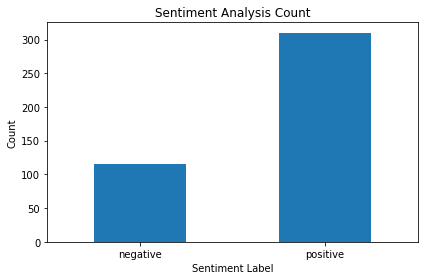

In [34]:
ax = df_summary[['polarity']].plot(kind='bar', legend=False)
ax.set_xlabel('Sentiment Label')
ax.set_ylabel('Count')
ax.set_title('Sentiment Analysis Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

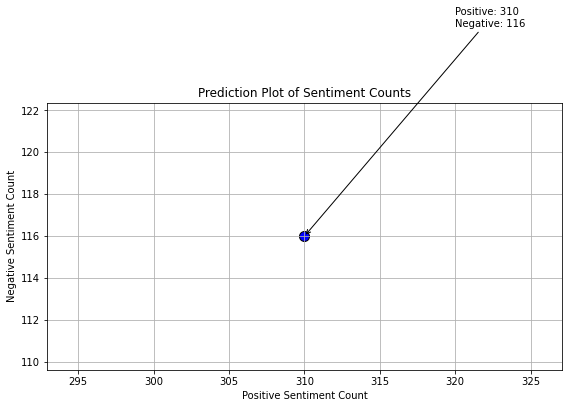

In [45]:
#X-Y plane

plt.figure(figsize=(8, 6))
plt.scatter(positive_count, negative_count, color='blue', s=100, edgecolor='black')

plt.annotate(f'Positive: {positive_count}\nNegative: {negative_count}',
             xy=(positive_count, negative_count),
             xytext=(positive_count + 10, negative_count + 10),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.xlabel('Positive Sentiment Count')
plt.ylabel('Negative Sentiment Count')
plt.title('Prediction Plot of Sentiment Counts')
plt.grid(True)

plt.tight_layout()
plt.show()